# Load data

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the text file
data_file = "bogus_student_data.txt"
with open(data_file, "r") as file:
    # Skip the first line (header)
    next(file)
    lines = file.readlines()

# Parse the data and create lists for each column
exercise_points = []
exam_points = []
grades = []
for line in lines:
    line_data = line.strip().split()
    exercise_points.append(float(line_data[0]))
    exam_points.append(float(line_data[1]))
    grades.append(float(line_data[2]))

# Visualize the distribution of the final grades. Visualize the connection between exercises done and points earned in the exam. What conclusions could you draw from these plots?

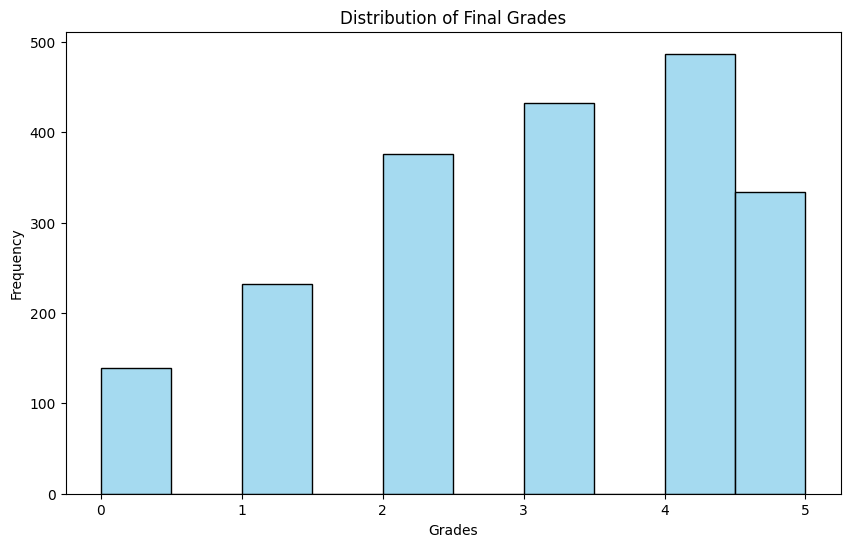

In [27]:
# Visualize the distribution of final grades
plt.figure(figsize=(10, 6))
sns.histplot(grades, bins=10, color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
#plt.grid(True)
plt.show()


The histogram plot shows the frequency distribution of final grades among students. It helps understand the overall performance distribution. There are no observed outliers that may represent students who significantly outperformed or underperformed compared to the majority.

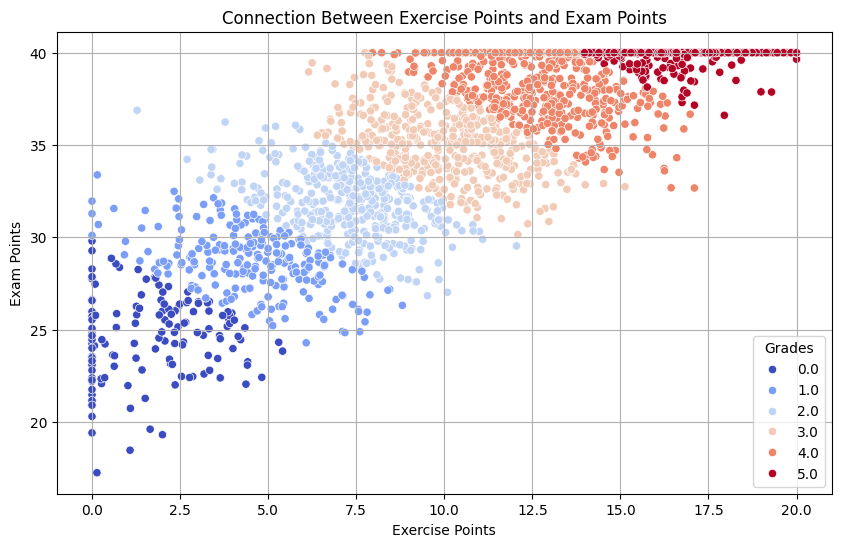

In [21]:
# Visualize the connection between exercises done and points earned in the exam
plt.figure(figsize=(10, 6))
sns.scatterplot(x=exercise_points, y=exam_points, hue=grades, palette='coolwarm')
plt.title('Connection Between Exercise Points and Exam Points')
plt.xlabel('Exercise Points')
plt.ylabel('Exam Points')
plt.grid(True)
plt.legend(title='Grades')
plt.show()

The scatter plot illustrates the relationship between exercise points and exam points, with different grades represented by colors. It allows us to observe any patterns or correlations between these variables, indicating how well exercise performance translates to exam performance. It is fr easier to spot Outliers in this plot that may indicate students who achieved higher or lower exam scores relative to their exercise performance. **There is a correlation between excercise points and exam points**

# Compute the mean and standard deviation (std) of exercise points over all observations.Then compute mean and std. per grade (i.e. one mean/std for students who gained grade 0,one for students who gained 1, etc.)

In [28]:
import numpy as np

# Compute the mean and standard deviation of exercise points over all observations
exercise_mean_all = np.mean(exercise_points)
exercise_std_all = np.std(exercise_points)

# Create a dictionary to store mean and std. per grade
grade_means = {}
grade_stds = {}

# Compute mean and std. per grade
for grade in set(grades):
    indices = [i for i, g in enumerate(grades) if g == grade]
    grade_exercise_points = [exercise_points[i] for i in indices]
    grade_means[grade] = np.mean(grade_exercise_points)
    grade_stds[grade] = np.std(grade_exercise_points)

# Print results
print("Mean exercise points over all observations:", exercise_mean_all)
print("Standard deviation of exercise points over all observations:", exercise_std_all)
print("\nMean and standard deviation of exercise points per grade:")
for grade in sorted(grade_means.keys()):
    print(f"Grade {grade}: Mean = {grade_means[grade]}, Std. = {grade_stds[grade]}")


Mean exercise points over all observations: 10.10813
Standard deviation of exercise points over all observations: 4.659659580173212

Mean and standard deviation of exercise points per grade:
Grade 0.0: Mean = 1.8310791366906474, Std. = 1.51760208936699
Grade 1.0: Mean = 4.599181034482759, Std. = 1.7097503654200816
Grade 2.0: Mean = 7.3363297872340425, Std. = 1.5564404075659979
Grade 3.0: Mean = 10.006388888888889, Std. = 1.6470519164349673
Grade 4.0: Mean = 12.685030800821357, Std. = 1.6404048522037007
Grade 5.0: Mean = 16.87395209580838, Std. = 1.7757170966361806


# Can you reliably tell if student is going to get grade 5 or grade 0 by looking at the amount of done exercise alone? What would be the amount of exercise points that you could say the student will get grade 5? Repeat this for grades 4 and 5.

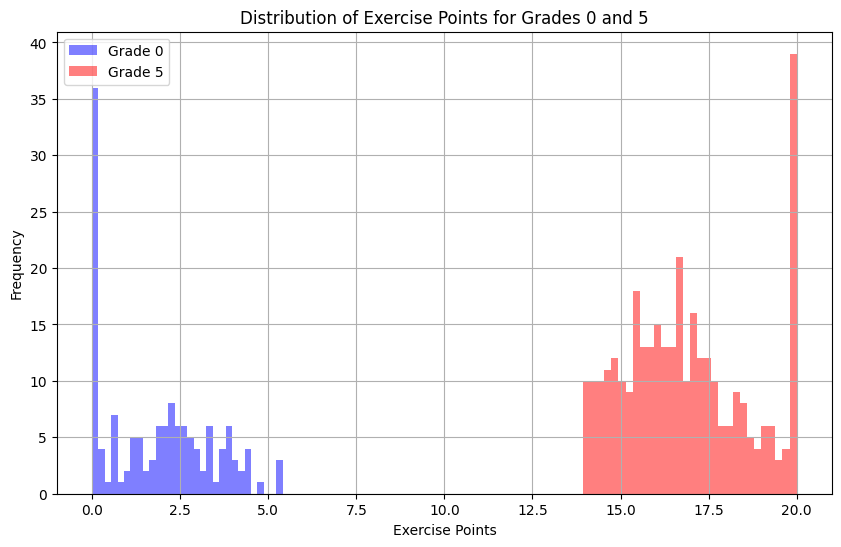

Exercise points threshold for predicting Grade 5: 18.649669192444563


In [31]:
import matplotlib.pyplot as plt

# Extract exercise points for grades 0 and 5
exercise_points_grade_0 = [point for point, grade in zip(exercise_points, grades) if grade == 0]
exercise_points_grade_5 = [point for point, grade in zip(exercise_points, grades) if grade == 5]

# Visualize the distribution of exercise points for grades 0 and 5
plt.figure(figsize=(10, 6))
plt.hist(exercise_points_grade_0, bins=30, alpha=0.5, color='blue', label='Grade 0')
plt.hist(exercise_points_grade_5, bins=30, alpha=0.5, color='red', label='Grade 5')

plt.title('Distribution of Exercise Points for Grades 0 and 5')
plt.xlabel('Exercise Points')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean and standard deviation of exercise points for grade 5
mean_grade_5 = np.mean(exercise_points_grade_5)
std_grade_5 = np.std(exercise_points_grade_5)

# Determine the exercise point threshold for predicting grade 5
threshold_grade_5 = mean_grade_5 + std_grade_5
print("Exercise points threshold for predicting Grade 5:", threshold_grade_5)


For Grade 0 and 5, there is no overlap in the distribution of excercise points in each grade so there is a threshold for reliably predicting grade 5

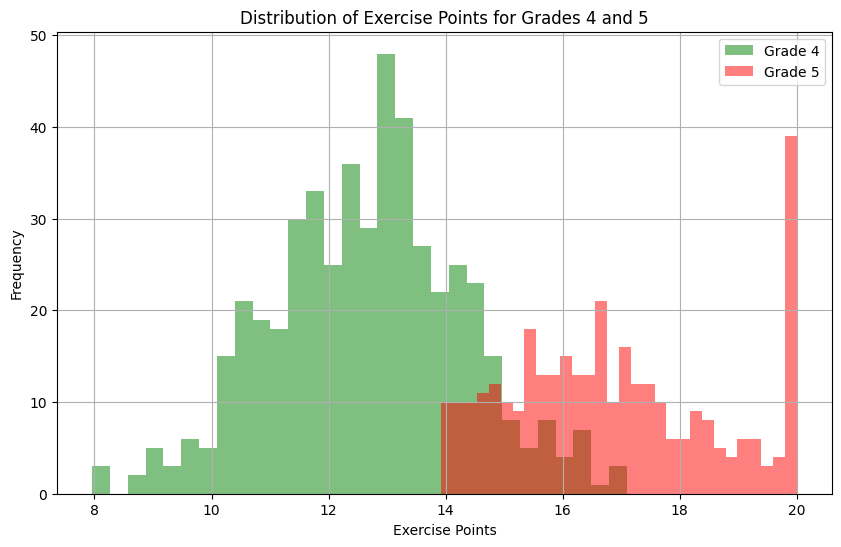

Exercise points threshold for predicting Grade 4: 14.325435653025057
Exercise points threshold for predicting Grade 5: 18.649669192444563


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract exercise points for grades 4 and 5
exercise_points_grade_4 = [point for point, grade in zip(exercise_points, grades) if grade == 4]
exercise_points_grade_5 = [point for point, grade in zip(exercise_points, grades) if grade == 5]

# Visualize the distribution of exercise points for grades 4 and 5
plt.figure(figsize=(10, 6))
plt.hist(exercise_points_grade_4, bins=30, alpha=0.5, color='green', label='Grade 4')
plt.hist(exercise_points_grade_5, bins=30, alpha=0.5, color='red', label='Grade 5')

plt.title('Distribution of Exercise Points for Grades 4 and 5')
plt.xlabel('Exercise Points')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean and standard deviation of exercise points for grade 4
mean_grade_4 = np.mean(exercise_points_grade_4)
std_grade_4 = np.std(exercise_points_grade_4)

# Determine the exercise point threshold for predicting grade 4
threshold_grade_4 = mean_grade_4 + std_grade_4
print("Exercise points threshold for predicting Grade 4:", threshold_grade_4)

# Calculate the mean and standard deviation of exercise points for grade 5 (if not calculated already)
mean_grade_5 = np.mean(exercise_points_grade_5)
std_grade_5 = np.std(exercise_points_grade_5)

# Determine the exercise point threshold for predicting grade 5 (if not calculated already)
threshold_grade_5 = mean_grade_5 + std_grade_5
print("Exercise points threshold for predicting Grade 5:", threshold_grade_5)


For Grade 4 and 5, there is an overlap in the distribution of their excercise points. While the threshold for grade 5 seems okay, the threshold for grade 4 still has some of grade 5 excerise points.

# Given the normal data illustrated in the figure on the left, generate ten circle detectors using the negative selection algorithm. You are free to choose the sizes of detectors. The lower and upper limits of the data are 0 and 1, respectively. Show your detectors in the same figure. An example of detectors is given in the figure on the right. The normal data is saved in Normal_Data.txt

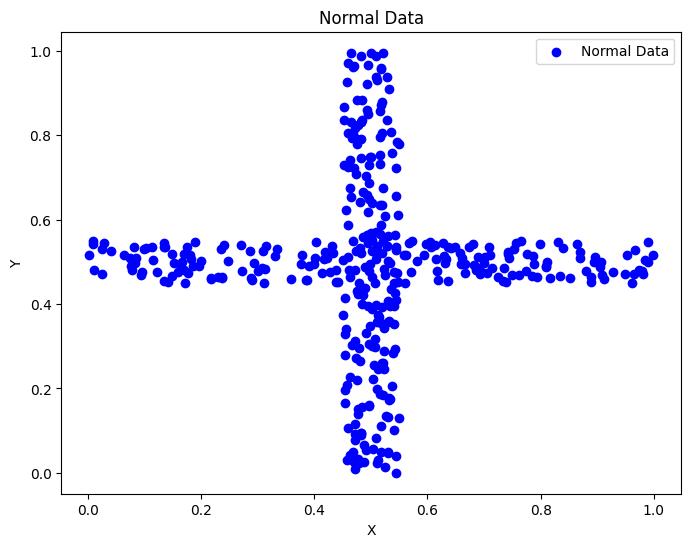

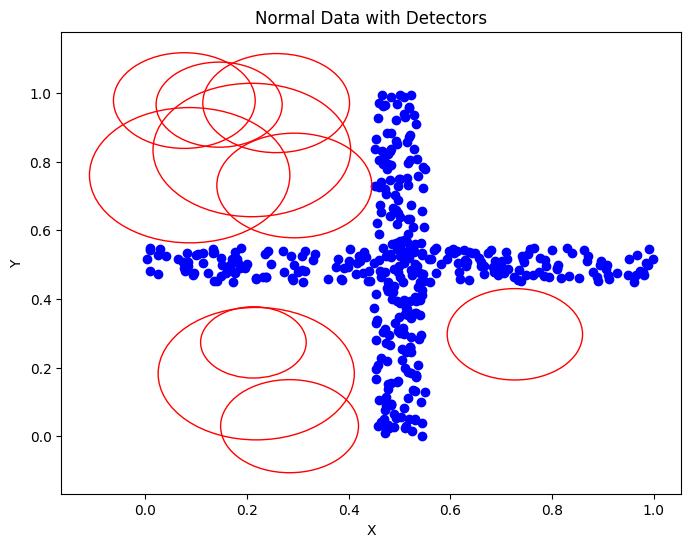

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load normal data and transpose
with open("Normal_Data.txt", "r") as file:
    lines = file.readlines()
    normal_data = np.array([list(map(float, line.strip().split(','))) for line in lines]).T

#Generate circle detectors
num_detectors = 10
detectors = []

#function to check if detector covers any normal data point
def covers_data(center, radius):
    for point in normal_data:
        if np.linalg.norm(point - center) <= radius:
            return True
    return False

# Generate detectors
for _ in range(num_detectors):
    # Randomly choose center and radius for each detector
    while True:
        center = np.random.uniform(0, 1, size=2)
        radius = np.random.uniform(0.1, 0.2)
        if not covers_data(center, radius):
            break
    detectors.append((center, radius))

# Step 3: Plot normal data
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='b', label='Normal Data')
plt.title('Normal Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Step 4: Plot normal data with detectors
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='b', label='Normal Data')

for center, radius in detectors:
    circle = Circle(center, radius, color='r', fill=False)
    plt.gca().add_patch(circle)

plt.title('Normal Data with Detectors')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
